Retrain your model using the above suggestions (be sure to split your data into train/test where appropriate), and deliver a notebook containing a detailed evaluation report listing the metrics listed below, along with your commentary to each:

1. The accuracy of your model on the test data
2. The precision and recall values
3. A classification report (scikit-learn has a function that can create this for you)
4. The confusion matrix for this experiment
5. An ROC curve
6. A Precision/Recall curve

In [10]:
%pylab inline
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.preprocessing import label_binarize

fileURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
lens=pd.read_csv(fileURL, names=['ID', 'Age', 'Spectacle_Prescription','astigmatic','tear_production_rate','Classes'],header=None,delim_whitespace=True)
lens = lens[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate','Classes']]
#-- 3 Classes
#     1 : the patient should be fitted with hard contact lenses,
#     2 : the patient should be fitted with soft contact lenses,
#     3 : the patient should not be fitted with contact lenses.
#convert class 1 and 2 as 1, convert class 3 as 0

lens['Classes'].replace({1:1,2:1,3:0},inplace=True)

train, test= train_test_split(lens,train_size=0.5)

print("training set's length" , len(train))
print("testing set's length", len(test))


Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


training set's length 12
testing set's length 12


In [11]:
lens[12:]

,Age,Spectacle_Prescription,astigmatic,tear_production_rate,Classes
12,2,2,1,1,0
13,2,2,1,2,1
14,2,2,2,1,0
15,2,2,2,2,0
16,3,1,1,1,0
17,3,1,1,2,0
18,3,1,2,1,0
19,3,1,2,2,1
20,3,2,1,1,0
21,3,2,1,2,1


In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
train_features = train[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate']]
train_target = train[['Classes']]
test_features = test[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate']]
test_target = test[['Classes']]
clf = clf.fit(train_features, train_target)

In [13]:
train_features[:5]

,Age,Spectacle_Prescription,astigmatic,tear_production_rate
17,3,1,1,2
19,3,1,2,2
3,1,1,2,2
11,2,1,2,2
16,3,1,1,1


In [14]:
train_target[:5]

,Classes
17,0
19,1
3,1
11,1
16,0


In [15]:
test_features
test_target

,Classes
21,1
1,1
20,0
6,0
14,0
12,0
22,0
0,0
15,0
8,0


In [16]:
y_pred = clf.predict(test_features)
y_pred = np.array(y_pred)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [17]:
y_pred_prob = clf.predict_proba(test_features)
y_pred_prob_class1 = y_pred_prob[:, 1]
y_pred_prob_class1

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.])

The probability score for y_true is either 0 or 1, which shows that this model is always making confident prediction. It is also because all the attributes are binary. 

In [18]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_target, y_pred)

0.83333333333333337

The model predicts 83% of testing set correctly, which means out of 12 instances, the sum of TP and TN is 12 * 83% = 10

In [19]:
#calculate precision, recall, fscore
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_target, y_pred, average='binary')

(0.75, 0.75, 0.75, None)

Positive predictive value is 0.75 which means out of all the predicted positive instances, 75% are TP. FP rate is about 25%. When a patient is predicted to wear lens, 75% posibility that it is correct. 

And recall is 0.75 which means out of all true positive instances, 0.75 are predicted correctly.  High recall rate means it is less likely to predict a positive instance as negative class. Among all patients who need lens, 0.75 of them will be predicted to have lens. 

In [20]:
#calculate and print classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test_target, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.88      0.88      0.88         8
    class 1       0.75      0.75      0.75         4

avg / total       0.83      0.83      0.83        12



Each class has the same precision and same recall. Since this data set is small, so we might need more data to make predictions. Support for class1 is only half of class0. 

In [21]:
#calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_target, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP,TN,FP,FN

(3, 7, 1, 1)

The confusion matrix shows that 10/12 of test set are predicted correctly. 3 are true positive, and 7 are true negative. This is an inbalanced case.

[ 0.     0.125  1.   ]
[ 0.    0.75  1.  ]


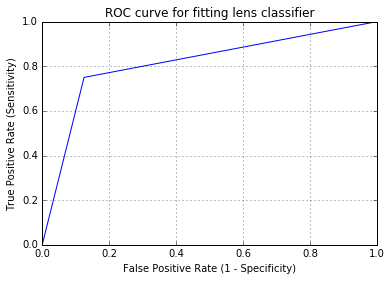

In [23]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(test_target, y_pred_prob_class1)
plt.plot(fpr1, tpr1)
print(fpr1)
print(tpr1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for fitting lens classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [24]:
from sklearn import metrics
metrics.auc(fpr1, tpr1)

0.8125

Points closer to left top conner has higher True positive rate and smaller false positive rate. The area under ROC curve is 0.8125, we can see that this classification quality is not random. According to ROC curve, TP grows faster than FP when FP is between 0 and 0.15, after point (0.15, 0.78), FP is growing faster than TP. Our test set has 4 positive instances and 8 negative instances. It has good early retrieval. 

[ 0.33333333  0.75        1.        ]
[ 1.    0.75  0.  ]


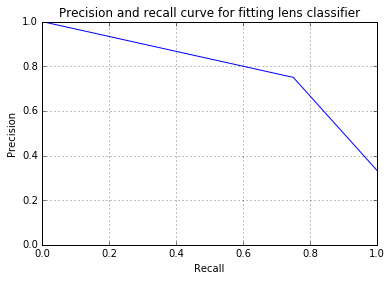

In [25]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(test_target, y_pred_prob_class1)
plt.plot(recall, precision)
print(precision)
print(recall)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision and recall curve for fitting lens classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

We can see the trade-off between precision and recall, when recall increases, the precision decreases. Linear line for recall[0, 0.78] is smaller slope than the line for recall[0.78, 1]. 

Nearest Neighbors
[ 0.33333333  1.          0.          0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.66666667  0.33333333  0.66666667  0.66666667]
AUC area
0.84375
Decision Tree
[ 0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
AUC area
0.8125
Random Forest
[ 0.4  0.7  0.1  0.   0.   0.1  0.   0.1  0.7  0.   0.6  0.6]
AUC area
0.890625


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


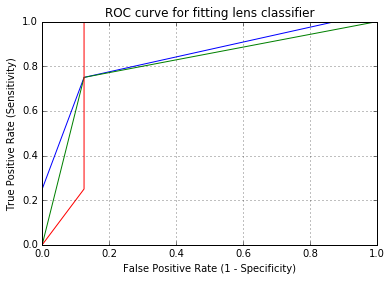

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

names = ["Nearest Neighbors", "Decision Tree", "Random Forest"]
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(train_features, train_target)
    score = clf.predict_proba(test_features)[:, 1]
    print(score)
    fpr, tpr, thresholds = roc_curve(test_target, score.ravel())
    plt.plot(fpr, tpr)
    print("AUC area")
    print(metrics.auc(fpr, tpr))
        

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for fitting lens classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



We can see that random forest classifier and 3-nearest neighbor have higher AUC area than decision tree.  Random forest classifier's ROC curve dominates decision tree's. 

Nearest Neighbors
[ 0.33333333  1.          0.          0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.66666667  0.33333333  0.66666667  0.66666667]
[ 0.36363636  0.75        1.          1.        ]
[ 1.    0.75  0.25  0.  ]
Decision Tree
[ 0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
[ 0.33333333  0.75        1.        ]
[ 1.    0.75  0.  ]
Random Forest
[ 0.5  0.6  0.3  0.   0.1  0.5  0.   0.5  0.3  0.7  0.4  0.1]
[ 0.4    0.375  0.5    0.4    0.5    0.     1.   ]
[ 1.    0.75  0.75  0.5   0.25  0.    0.  ]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


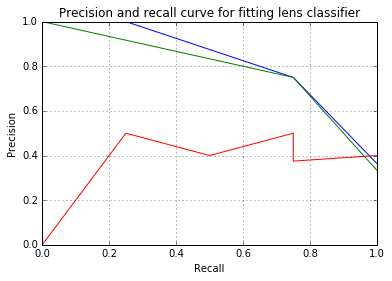

In [28]:
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(train_features, train_target)
    score = clf.predict_proba(test_features)[:, 1]
    print(score)
    precision, recall, thresholds = precision_recall_curve(test_target, score.ravel())
    plt.plot(recall, precision)
    print(precision)
    print(recall)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision and recall curve for fitting lens classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

Decision tree and Random forest have better precision-recall curve than 3-nearest neigbors for they are closer to the right top conner where precision is 1 and recall is 1. As Random forest classifier's ROC curve dominates decision tree's ROC curve, random forest's precision-recall curve also dominates decision tree's precision-recall curve.  